# Programming Language and its trends.

For this Project, i am using Stack Overflow data from 2018 and 2019 to answer:
    1. Which are the most used programming languages around the world in 2018 and 2019?
    2. Which are the most uded programming languages in the United States?
    3. Career satisfaction growth in United States in 2018 and 2019.
    4. Job satisfaction growth in United States in 2018 and 2019.

#### Import required libraries

In [1]:
# Libraries to handle data
import numpy as np
import pandas as pd
from collections import Counter
import math

# to plot and chart
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# to ignore warning
import warnings
warnings.filterwarnings("ignore")

### Data Understanding
#### Read required CSV files.

First, lets load the CSV files and check the data and columns.

In [2]:
df_2018 = pd.read_csv('survey_results_public_2018.csv')
df_2019 = pd.read_csv('survey_results_public_2019.csv')

In [3]:
df_2018.head()

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,...,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,...,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,No,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Full-stack developer,...,I don't typically exercise,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,35 - 44 years old,No,No,The survey was an appropriate length,Somewhat easy
4,7,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Data or business analyst;Desktop or enterprise...,...,3 - 4 times per week,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,18 - 24 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy


In [4]:
df_2019.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


In [5]:
df_2018.columns

Index(['Respondent', 'Hobby', 'OpenSource', 'Country', 'Student', 'Employment',
       'FormalEducation', 'UndergradMajor', 'CompanySize', 'DevType',
       ...
       'Exercise', 'Gender', 'SexualOrientation', 'EducationParents',
       'RaceEthnicity', 'Age', 'Dependents', 'MilitaryUS', 'SurveyTooLong',
       'SurveyEasy'],
      dtype='object', length=129)

In [6]:
df_2019.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode',
       'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
       'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife'

### Data Preparation

#### Write necessary functions

In [7]:
# function for filtering the dataframe
def fil(df, columns):

    df_duplicate = df
    
    for column in columns: 
        df_duplicate = df_duplicate.dropna(subset=[column])
        
    return df_duplicate


# function for filtering country.
def fil_country(df1, column_filter, country, columns):
    ''' Filter a dataframe by country.,
        returns filtred dataframe.
    '''
    
    df_duplicate = df1
    
    for column in columns: 
        df_duplicate = df_duplicate[df_duplicate[column_filter] == country].dropna(subset=[column])
        
    return df_duplicate

# function for splitting columns
def split_column(df2, column):
    ''' Split column by ;,
        returns a splited series.
    '''
    
    df_duplicate1 = df2
    column_split = df_duplicate1[column].apply(lambda x: x.split(';'))
    
    return column_split

# function for transforming nested list to flat list
def disarray(array_list):
    ''' Flat a nested list,
        returns a flat list.
    '''
    
    obj = []
    
    for row in array_list:
        for i in row:
            obj.append(i.strip())
            
    return obj

# function for obtaining dict
def group_list(data_list, year):
    ''' Group by count to a list,
        returns a result dict.
    '''
    
    grouped_list = dict(Counter(data_list))
    grouped_dict = [{'Language':key, 'Count': value, 'Year': year} for key, value in grouped_list.items()]
    
    return grouped_dict

# function for creating dataframe
def create_dataframe(data_dicts):
    ''' Create two dataframes and append them,
        returns a appended dataframe.
    '''
        
    df1 = pd.DataFrame(data_dicts[0])
    df2 = pd.DataFrame(data_dicts[1])

    df = df1.append(df2)
    return df

# function for scaling data into percenatge
def percentage(df, column):
    ''' Scale data,
        returns data scaled.
    '''
    
    df_copy = df
    series = []
    
    for val in df_copy[column].unique():
        series.append(df_copy[df_copy[column] == val]['Count'] / 
                      df_copy[df_copy[column] == val]['Count'].sum())
    
    joined_series = pd.Series()
    for i_series in series:
        joined_series = joined_series.append(i_series)
        
    return joined_series


## 1. What are the most used programming language around the world in 2018 and 2019?

In [8]:
# Filter the dataframe by selecting 'LanguageWorkedWith'
lang_world_2018 = fil(df_2018, ['LanguageWorkedWith'])
lang_world_2019 = fil(df_2019, ['LanguageWorkedWith'])

# Splitting the Data Frame by column into Series.
lang_world_worked_2018 = split_column(lang_world_2018, 'LanguageWorkedWith')
lang_world_worked_2019 = split_column(lang_world_2019, 'LanguageWorkedWith')

# Flatting the list objects.
list_lang_world_worked_2018 = disarray(lang_world_worked_2018)
list_lang_world_worked_2019 = disarray(lang_world_worked_2019)

# Grouping a list and building a dict.
dict_lang_world_worked_2018 = group_list(list_lang_world_worked_2018,'2018')
dict_lang_world_worked_2019 = group_list(list_lang_world_worked_2019,'2019')

In [9]:
# Creating a Data Frame appending the data.
lang_world_worked = create_dataframe([dict_lang_world_worked_2018, dict_lang_world_worked_2019])

# calculating Percentage
lang_world_worked['Percentage'] = percentage(lang_world_worked,'Year')

In [10]:
# skimming top 10
top_world_lang = lang_world_worked.sort_values(by=['Percentage'], ascending=False)

In [11]:
top_world_lang = top_world_lang.head(30)['Language'].unique()

In [12]:
lang_world_worked = lang_world_worked[lang_world_worked['Language'].isin(top_world_lang)]

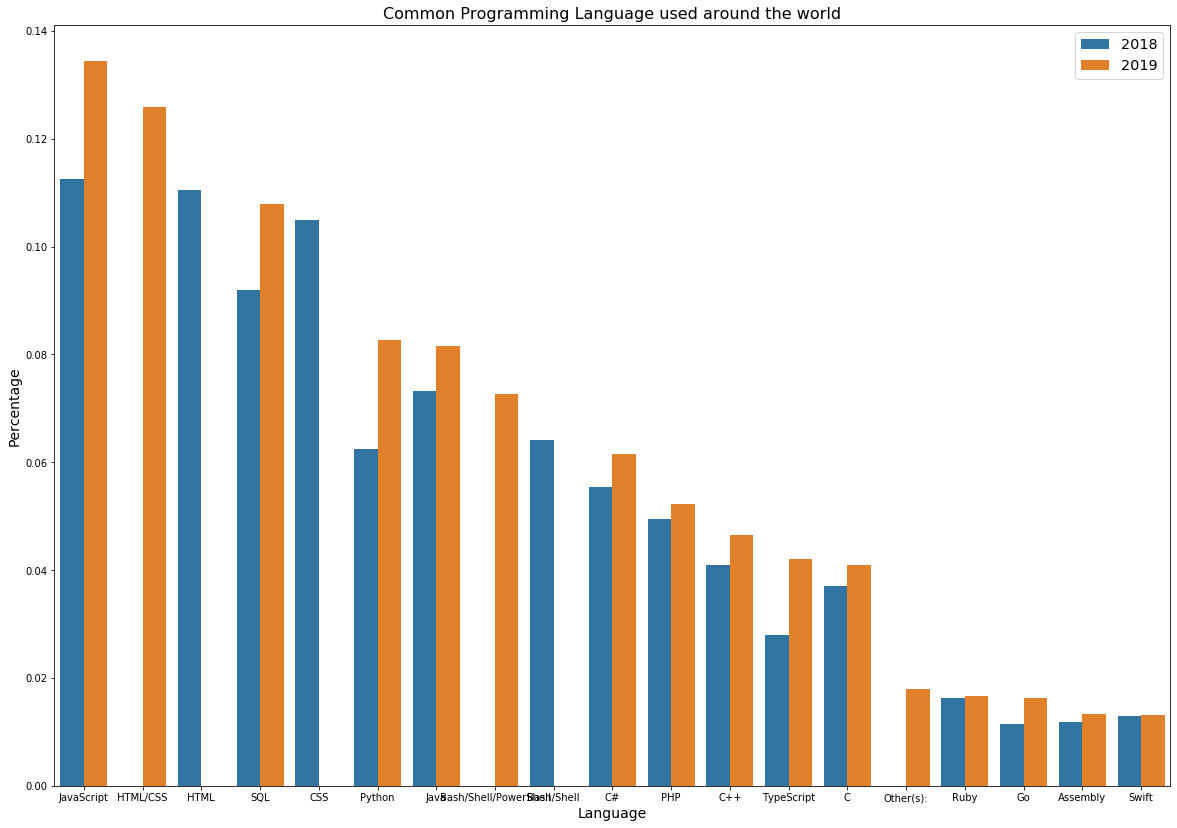

In [13]:
# Plot 1- Percentage of prgramming language useed arounf the world in 2018 and 2019
plt.figure(figsize=(20,14))
sns.barplot(x = 'Language', 
            y = 'Percentage',
            hue = 'Year',
            data = lang_world_worked.sort_values(by=['Percentage'], ascending=False))

plt.xlabel("Language", fontsize = 14)
plt.ylabel("Percentage", fontsize = 14)
plt.legend(fontsize='x-large', title_fontsize='40')
plt.title('Common Programming Language used around the world', size = 16)
plt.show()

In the above figure, we can notice that all the language has seen growth. But JavaScript, HTML/CSS, Python have made significant growth compared to other languages as per the survey report report from Stack Overflow 2018 and 2019.

### Lets check what amount of data belongs to United States.

In [14]:
len(set(df_2018['Country']))

184

In 184 countries, one belong to Nan. So there are 183 countries in the Country column.

In [15]:
count1=df_2018['Country'].value_counts()
total_2018 = np.sum(count1)
count_2018=count1['United States']


count2=df_2019['Country'].value_counts()
total_2019 = np.sum(count2)
count_2019=count2['United States']

In [16]:
print ("Out of {} world wide data, {} belongs to United States in 2018".format(total_2018, count_2018))
print ("Out of {} world wide data, {} belongs to United States in 2019".format(total_2019, count_2019))

Out of 98443 world wide data, 20309 belongs to United States in 2018
Out of 88751 world wide data, 20949 belongs to United States in 2019


As we can see there are 183 countries and only around 20% of data belongs to the United States. So lets focus on United States to view the trends.

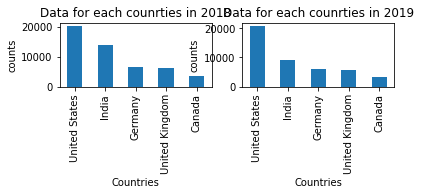

In [17]:
plt.subplot(3,2,1);
count1[0:5].plot(kind='bar');
plt.xlabel("Countries");
plt.ylabel("counts");
plt.title("Data for each counrties in 2018");
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)


plt.subplot(3,2,2);
count2[0:5].plot(kind='bar');
plt.xlabel("Countries");
plt.ylabel("counts");
plt.title("Data for each counrties in 2019");


## 2. What are the most used programming language in the United States in 2018 and 2019?

In [18]:
# 2018 data
lang_2018 = fil_country(df_2018,'Country','United States', ['LanguageWorkedWith'])
lang_worked_2018 = split_column(lang_2018, 'LanguageWorkedWith')
list_lang_worked_2018 = disarray(lang_worked_2018)
dict_lang_worked_2018 = group_list(list_lang_worked_2018,'2018')

# 2019 data
lang_2019 = fil_country(df_2019,'Country', 'United States', ['LanguageWorkedWith'])
lang_worked_2019 = split_column(lang_2019, 'LanguageWorkedWith')
list_lang_worked_2019 = disarray(lang_worked_2019)
dict_lang_worked_2019 = group_list(list_lang_worked_2019,'2019')

In [19]:
# Creating Dataframe
lang_worked = create_dataframe([dict_lang_worked_2018, dict_lang_worked_2019])

# calculating Percentage
lang_worked['Percentage'] = percentage(lang_worked,'Year')

In [20]:
# retriving top Operating Systems
top_lang = lang_worked.sort_values(by=['Percentage'], ascending=False)

In [21]:
top_lang = top_lang.head(30)['Language'].unique()

In [22]:
lang_worked_us = lang_worked[lang_worked['Language'].isin(top_lang)]

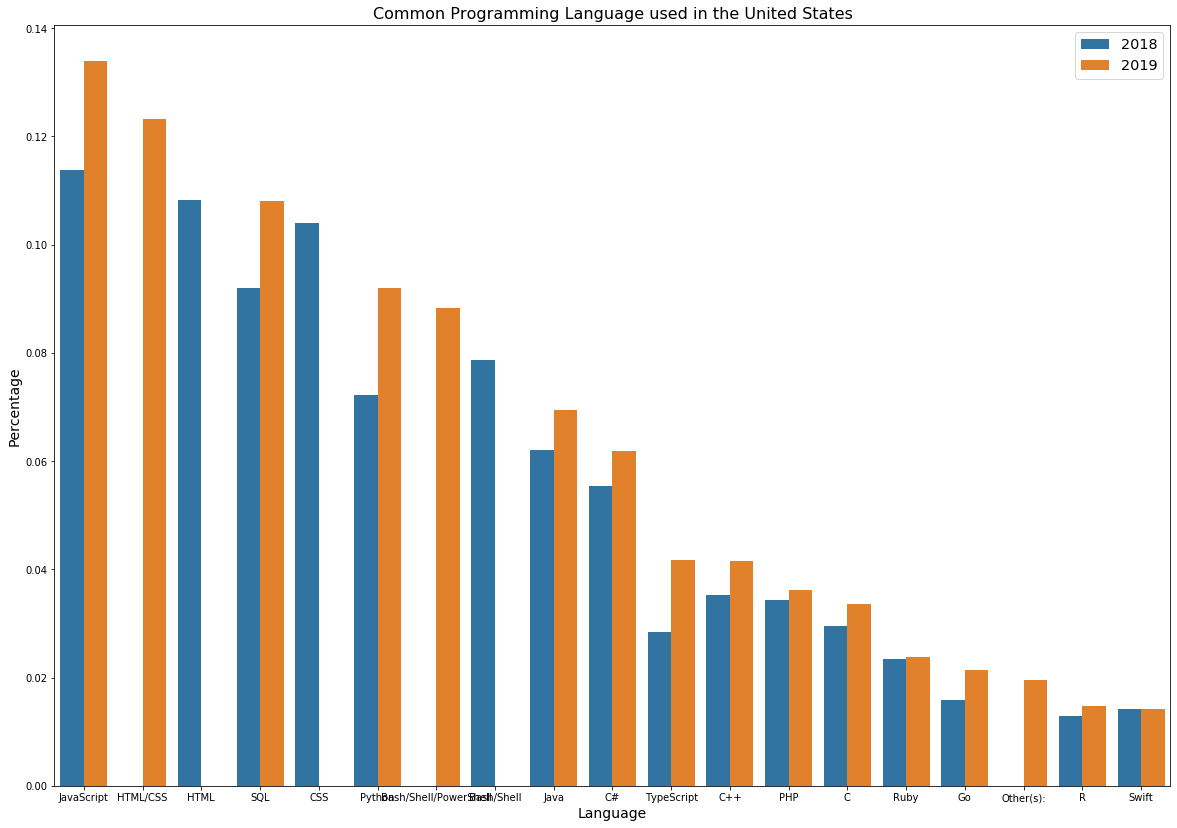

In [23]:
plt.figure(figsize=(20,14))
sns.barplot(x = 'Language', 
            y = 'Percentage',
            hue = 'Year',
            data = lang_worked_us.sort_values(by=['Percentage'], ascending=False))

plt.xlabel("Language", fontsize = 14)
plt.ylabel("Percentage", fontsize = 14)
plt.legend(fontsize='x-large', title_fontsize='40')
plt.title('Common Programming Language used in the United States', size = 16)
plt.show()

Even though Dataset contains 183 countries and  20-25% of United States data, the percentage of languages used in United States 2018 and 2019 looks similar to the percentage of languages used around the world in 2018 and 2019.

Even in the United states JavaScript, HTML/CSS, Python has seen significant growth.

## 3. Career Satisfication in United States in 2018 and 2019.

## 4. Job Satisfication in United States in 2018 and 2019.

### Data preparation

In [24]:
#Copy selected columns to new Data Frame
code_2018 = df_2018[['Country','YearsCoding','CareerSatisfaction','JobSatisfaction']]
code_2019 = df_2019[['Country','YearsCode','CareerSat','JobSat']]

In [25]:
# Rename the columns to match the names in both data frame
code_2019.rename(columns = {'CareerSat':'CareerSatisfaction'}, inplace=True)
code_2019.rename(columns = {'YearsCode':'YearsCoding'}, inplace=True)
code_2019.rename(columns = {'JobSat':'JobSatisfaction'}, inplace=True)

In [26]:
# Skim to only United States data
code_2018_us = code_2018.loc[code_2018['Country']=='United States']
code_2019_us = code_2019.loc[code_2019['Country']=='United States']

In [27]:
# Drop missing data
code_2018_us=code_2018_us.dropna()
code_2019_us=code_2019_us.dropna()

Since Job Satisfaction, Career Satisfaction and Yearcoded are in strings, it is better to convert them to integer for easy plotting.

In [28]:
# function for handling yearscoded

def yearscodedjob(df,column):
    """
    
    Convert the working year to integer for calculating the mean
    
    Parameters:
    df: a dataframe that will be converted
    
    Returns:
    dataframe: a converted dataframe with YearsCodedJob column becomes measurable
    
    """
    year_map = {'0-2 years':2,
                '12-14 years':14,
                '15-17 years':17,
                '18-20 years':20,
                '21-23 years':23,
                '24-26 years':26,
                '27-29 years':29,
                '3-5 years':5,
                '30 or more years':30,
                '6-8 years':8,
                '9-11 years':11,
                '1':1, '10':10, '11':11, '12':12, '13':13, '14':14,
                '15':15, '16':16, '17':17, '18':18, '19':19,
                '2':2, '20':20, '21':21, '22':22, '23':23, '24':24,
                '25':25, '26':26, '27':27, '28':28, '29':29,
                '3':3, '30':30, '31':31, '32':32, '33':33, '34':34,
                '35':35, '36':36, '37':37, '38':38, '39':39, 
                '4':4, '40':40, '41':41, '42':42, '43':43, '44':44,
                '45':45, '46':46, '47':47, '48':48, '49':49,
                '5':5, '50':50, '6':6, '7':7, '8':8, '9':9,
                'Less than 1 year':0, 'More than 50 years':50
               }
    
    cod = df.reset_index()
    cod[column] = cod[column].apply(lambda x: year_map[x])
    cod[column] = pd.to_numeric(cod[column])
    
    return cod

In [29]:
# Function for handing Job satisfaction and Career satisfaction
def carsat(df,column):
    """
    
    Convert the working year to integer for calculating the mean
    
    Parameters:
    df: a dataframe that will be converted
    
    Returns:
    dataframe: a converted dataframe with CareerSatisfaction and JobSatisfactioncolumn becomes measurable
    
    """
    year_map = {'Extremely dissatisfied':0,
                'Extremely satisfied':6,
                'Moderately dissatisfied':1,
                'Moderately satisfied':5,
                'Neither satisfied nor dissatisfied':3,
                'Slightly dissatisfied':2,
                'Slightly satisfied':4,
                'Very dissatisfied':0,
                'Very satisfied':6}
    
    cod = df.reset_index()
    cod[column] = cod[column].apply(lambda x: year_map[x])
    cod[column] = pd.to_numeric(cod[column])
    
    return cod

In [30]:
# Converting string to integer
cln_2018=yearscodedjob(code_2018_us,'YearsCoding')
cln_2019=yearscodedjob(code_2019_us,'YearsCoding')

## 3. Career Satisfication in United States in 2018 and 2019.

In [31]:
# Converting string to integer
clean_car_2018=carsat(cln_2018,'CareerSatisfaction')
clean_car_2019=carsat(cln_2019,'CareerSatisfaction')

In [32]:
# Sorting the data
clean_career_2018=clean_car_2018.sort_values(by='YearsCoding')
clean_career_2019=clean_car_2019.sort_values(by='YearsCoding')

In [33]:
# Adding new column 'year'
clean_career_2018['Year']=2018
clean_career_2019['Year']=2019

In [34]:
#combining both data set
car_code=clean_career_2018.append(clean_career_2019)

In [35]:
car_code1=car_code.groupby(['Year','YearsCoding']).mean().reset_index()

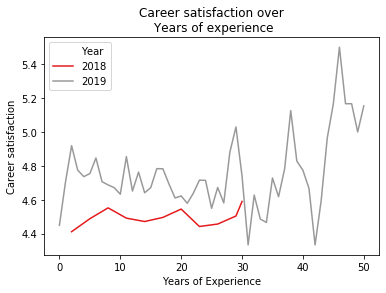

In [36]:
sns.lineplot(x="YearsCoding", y="CareerSatisfaction", hue="Year", data=car_code1, palette='Set1')
plt.title('Career satisfaction over\n Years of experience')
plt.ylabel('Career satisfaction')
plt.xlabel('Years of Experience');

As we can see from above lineplot, there is high career satisfaction in 2019 compared to 2018.

## 4. Job Satisfication in United States in 2018 and 2019.

In [37]:
# Converting string to integer
clean_job_2018=carsat(cln_2018,'JobSatisfaction')
clean_job_2019=carsat(cln_2019,'JobSatisfaction')

In [39]:
# Sorting the data
clean_job_2018=clean_job_2018.sort_values(by='YearsCoding')
clean_job_2019=clean_job_2019.sort_values(by='YearsCoding')

In [40]:
# Adding new column 'year'
clean_job_2018['Year']=2018
clean_job_2019['Year']=2019

In [41]:
#combining both data set
job_code1=clean_job_2018.append(clean_job_2019)

In [42]:
job_code1=job_code1.groupby(['Year','YearsCoding']).mean().reset_index()

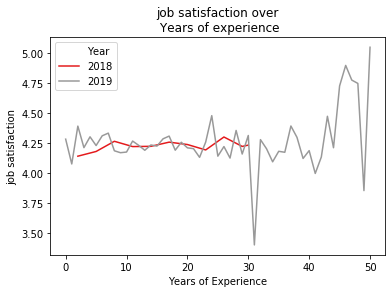

In [43]:
sns.lineplot(x="YearsCoding", y="JobSatisfaction", hue="Year", data=job_code1, palette='Set1')
plt.title('job satisfaction over\n Years of experience')
plt.ylabel('job satisfaction')
plt.xlabel('Years of Experience');

As we can see from above lineplot, there is similar job satisfaction in 2018 and 2019.